In [1]:
from os import path as op
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import pickle
import rasterio
from sklearn.model_selection import train_test_split
from collections import OrderedDict
import itertools
from torchvision import datasets,transforms,models
import torch.nn.functional as F 

from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 

In [2]:

%load_ext autoreload
%autoreload 2

In [3]:
from rasterize_polygons import *

In [21]:
# RASTERIZE THE POLYGONS

# the path to our raster
raster_path = '/Users/pavelbozmarov/Desktop/Desktop/SPACE INTELLIGENCE/Project_Scotland/data/raster_file/big.tif'

# open the training polygons and assign them to a geopandas dataframe
training_vectors_path = '/Users/pavelbozmarov/Desktop/Desktop/SPACE INTELLIGENCE/Project_Scotland/data/vector_file/Scotland_labels_final.geojson'
training_vectors = gpd.read_file(training_vectors_path)
# the directory where to save our output polygons
out_dir = '/Users/pavelbozmarov/Desktop/Desktop/SPACE INTELLIGENCE/Project_Scotland/data/vector_file/rasterized_vectors'

# rasterize our training polygons
vector2raster(raster_path=raster_path,gdf=training_vectors,out_dir=out_dir)

In [9]:
from make_tiles import *

In [10]:
# MAKE TILES FROM THE ORIGINAL RASTER ( ORIGINAL TIF IMAGE )

# we first get the tiles for the original tif_image
input_path = '/Users/pavelbozmarov/Desktop/Desktop/SPACE INTELLIGENCE/Project_Scotland/data/raster_file/big.tif'
output_folder = '/Users/pavelbozmarov/Desktop/Desktop/SPACE INTELLIGENCE/Project_Scotland/data/raster_file/tiles'

# make tiles
tile_raster(input_path,output_folder)

In [22]:
# MAKE TILES FROM THE MASK FILE TIF IMAGE
input_path = '/Users/pavelbozmarov/Desktop/Desktop/SPACE INTELLIGENCE/Project_Scotland/data/rasterized_vectors/rasterized_vectors.tif'
output_folder =  '/Users/pavelbozmarov/Desktop/Desktop/SPACE INTELLIGENCE/Project_Scotland/data/rasterized_vectors/tiles'

tile_raster(input_path,output_folder)

In [76]:
from create_cnn_dataset import *

In [35]:
X_dir ='/Users/pavelbozmarov/Desktop/Desktop/SPACE INTELLIGENCE/Project_Scotland/data/raster_file/tiles'
X_names = os.listdir(X_dir)

y_dir = '/Users/pavelbozmarov/Desktop/Desktop/SPACE INTELLIGENCE/Project_Scotland/data/rasterized_vectors/tiles'
y_names = os.listdir(y_dir)

In [ ]:
# CREATE OUR DATASET
X,y = create_dataset_XY(X_names,X_dir,y_dir)

**Important. Now we need to check that our dataset is correct. We do eye-tests by plotting**

In [41]:
X_name_0 = X_names[0]
X_name_0

'big_tile_4608-5120.tif'

In [43]:
find_label(X_name_0)

'rasterized_vectors_tile_4608-5120.tif'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


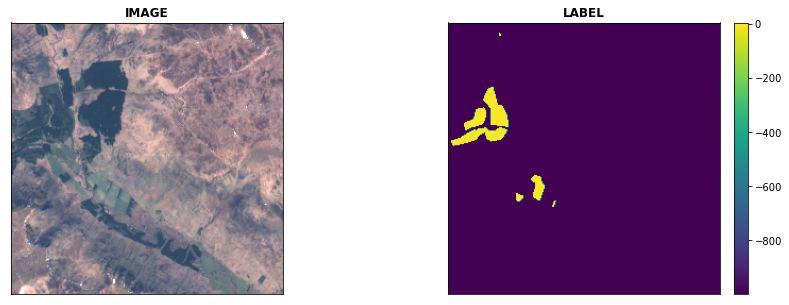

0 - Agriculture, 1 - Bares_and_Built, 2 - Bogs 
3 - Forest, 4 - Grassland, 5 - Shrub/Heathland
6 - Water, 9999 - No Data


In [77]:
display_rasters(X_name_0,X_dir,y_dir,brightness = 5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


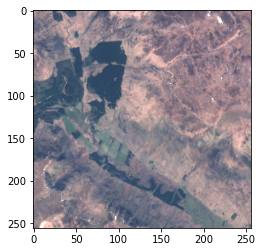

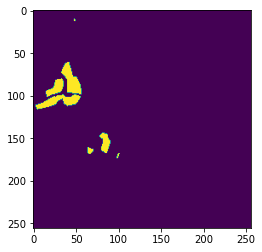

In [74]:
plt_image(0,X)
plt_label(0,y)

In [68]:
# NOW WE NEED TO CHECK OUR BANDS
path_to_raster_image_0 = X_dir + '/' + X_name_0
im0 = rasterio.open(path_to_raster_image_0)
im0.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 256,
 'height': 256,
 'count': 13,
 'crs': CRS.from_epsg(27700),
 'transform': Affine(20.0, 0.0, 327240.0,
        0.0, -20.0, 778500.0)}

In [69]:
# We checked with QGIS and saw that the labels allign properly.

**WE CLEAN OUR DATA SET A BIT**

In [70]:
n = 1
for item in np.array(X).shape:
    n=n*item
# we check for nans
print(f'NaNs:{(np.isnan(X)).sum()}')

# we check for nans as percentage of all
print(f'NaNs as Percentage:{(np.isnan(X)).sum()/n}')

NaNs:193011
NaNs as Percentage:0.00028604449647845644


In [71]:
# Replace NaNs with -1
X = np.nan_to_num(X,nan=-1)

In [78]:
X,y = clear_XY(X,y)

In [79]:
import numpy as np

# Save X and y as lists of numpy arrays
np.save('X.npy', X, allow_pickle=True)
np.save('y.npy',y,allow_pickle=True)

In [4]:
y = np.load('/Users/pavelbozmarov/Desktop/Desktop/SPACE INTELLIGENCE/Project_Scotland/Scotland_Segmentation_Sparse_Labels/data/y.npy')

In [10]:
# check how imbalanced is our dataset
np.unique(y,return_counts=True)

(array([-999.,    0.,    1.,    2.,    3.,    4.,    5.,    6.],
       dtype=float32),
 array([27340577,    69802,    28388,    12440,    96980,    63252,
           22711,    22042]))